<a href="https://colab.research.google.com/github/Biswarys/PanCard-Fraud-Detection/blob/main/PanCard_Tampering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PANCARD TAMPERING DETECTION

The purpose of this project is to detect tampering of Pancard using computer vision.
This project will help organisations detect if the Pancard provided by the employees to them is original or not.

For this project we will calculate structural similarity of original PAN card and the PAN card uploaded by user.

In [3]:
#Import Necessary Libraries
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [4]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

In [5]:
#open Image and Display
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw)

Load Original and User provided Images

In [6]:

#File Format of Source File
print("Original Image Format:", original.format)
print("Tampered Image Format:", tampered.format)

#Size of Source Files
print("Original Image Size:", original.size)
print("Tampered Image Size:", tampered.size)

Original Image Format: JPEG
Tampered Image Format: PNG
Original Image Size: (1200, 800)
Tampered Image Size: (282, 179)


Convert format of tampered image similar to original image

In [7]:
#Resize Image

original = original.resize((250,160))
print(original.size)
original.save('/content/pan_card_tampering/image/original.png')

tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('/content/pan_card_tampering/image/tampered.png')

(250, 160)
(250, 160)


Display Images

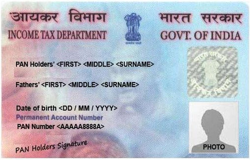

In [8]:
original

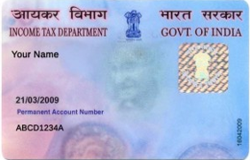

In [9]:
tampered

User provided image which will be compared with PAN card

In [10]:
#Load the two input images
original = cv2.imread('/content/pan_card_tampering/image/original.png')
tampered = cv2.imread('/content/pan_card_tampering/image/tampered.png')

Converting images into grayscale using opencv. Because in image processing many applications doesn't help us in identifying the important, edges of the coloured images also coloured images are bit complex to understand by machine beacuse they have 3 channel while grayscale has only 1 channel.  

In [12]:
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

**STRUCTURAL SIMILARITY INDEX**

Structural Similarity Index helps us to determine exactly where in terms of (x,y) coordinates location, the image differences are. Here, we are trying to find similarities between the original and tampered image. the lower the SSIM score, lower is the similarity.

In [13]:
(score, diff) = structural_similarity(original_gray, tampered_gray, full = True)
diff = (diff * 255).astype("uint8")
print("SSIM score: {}".format(score))

SSIM score: 0.31686135690489126


**Calculate Threshold and Contours**

Here we are using the threshold function of computer vision which applies an adaptive threshold to the image which is stored in the form array. This function transforms the grayscale image into a binary image using a mathematical formula.
Find contours works on binary image and retrive the contours. This contours are a useful tool for shape analysis and recoginition. Grab contours grabs the appropriate value of the contours.

In [14]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

**Bounding Rectangle**

Bounding rectangle helps in finding the ratio of width to height of bounding rectangle of the object. We compute the bounding box of the contour and then draw the bounding box on both input images to represent where the two images are different or not.

In [15]:
# loop over the contours
for c in cnts:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

Original Format Image


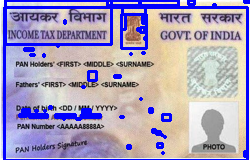

In [16]:
#Diplay original image with contour
print('Original Format Image')
Image.fromarray(original)

Tampered Image


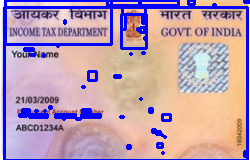

In [17]:
#Diplay tampered image with contour
print('Tampered Image')
Image.fromarray(tampered)

Different Image


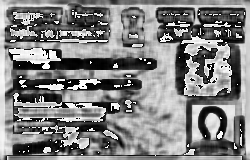

In [18]:
#Diplay difference image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


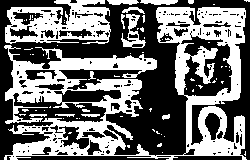

In [19]:
#Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)

**Summary**

Finding out structural similarity of the images helped us in finding the difference or similarity in the shape of the images. Similarly, finding out the threshold and contours based on those threshold for the images converted into grayscale binary also helped us in shape analysis and recognition.
As, our SSIM is ~31.2% we can say that the image user provided is fake or tampered.
Finally we visualized the differences and similarities between the images using by displaying the images with contours, difference and threshold.

**Scope**

This project can be used in different organizations where customers or users need to provide any kind of id in order to get themselves verified. The organization can use this project to find out whether the ID is original or fake. Similarly this can be used for any type of ID like adhar, voter id, etc.¶